In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("marketing_campaign.csv" , sep = '\t')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<AxesSubplot:>

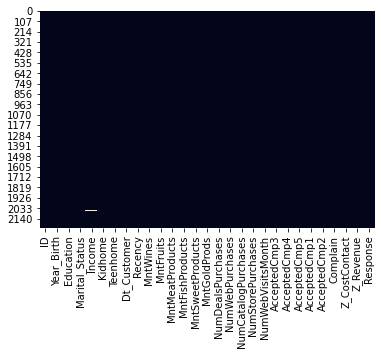

In [39]:
sns.heatmap(df.isnull(), cbar = False)

In [40]:
#there is 24 missing observations in income let's drop them

In [41]:
df.dropna(inplace = True)

<AxesSubplot:>

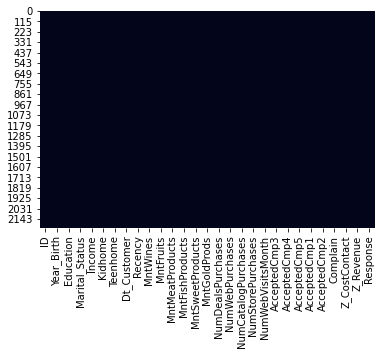

In [42]:
sns.heatmap(df.isnull() , cbar = False)

In [43]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [44]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [45]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [46]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 150000.0)

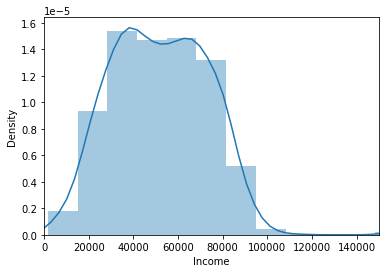

In [47]:
sns.distplot(df['Income'])
plt.xlim(0,150000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Recency', ylabel='Marital_Status'>

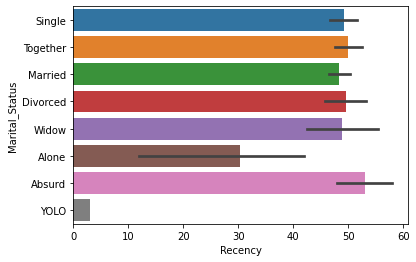

In [48]:
sns.barplot(df['Recency'] , df['Marital_Status'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='Income'>

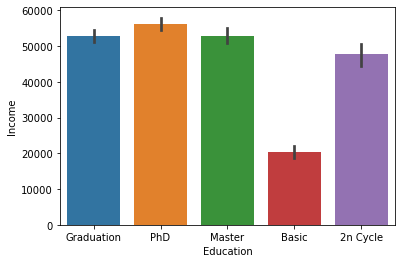

In [49]:
sns.barplot( df['Education'] , df['Income'])

<AxesSubplot:>

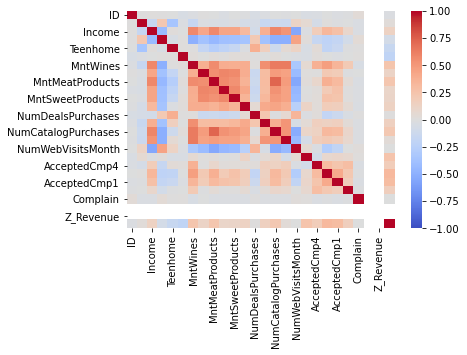

In [50]:
corr = df.corr()
sns.heatmap(corr , annot = False, cmap='coolwarm', vmin=-1, vmax=1)

In [51]:
# Change the name of the DataFrame from 'data' to 'df'
df["Age"] = 2024 - df["Year_Birth"]

# Total spendings on various items
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Deriving living situation by marital status: "Alone" or "Partner"
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
# Feature indicating total children living in the household
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]

# Feature pertaining to parenthood
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)

# Segmenting education levels into three groups
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# For clarity, renaming some columns
df = df.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})

# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

# Display the first few rows of the modified DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

<AxesSubplot:>

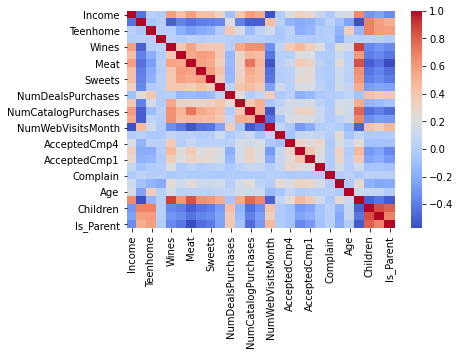

In [52]:
corr = df.corr()
sns.heatmap(corr , cmap = 'coolwarm')

In [53]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,5.000000,1.000000


In [56]:
from sklearn.preprocessing import LabelEncoder

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [57]:
df.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.611011,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.064079,0.013538,0.009477,0.150271,55.179603,607.075361,0.645307,0.947202,2.592509,0.714350
std,0.683469,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.478528,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,1.000000,3.000000,5.000000,1.000000


In [60]:
from sklearn.preprocessing import StandardScaler

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )


Explained Variance Ratio: [0.36869666 0.12995127]


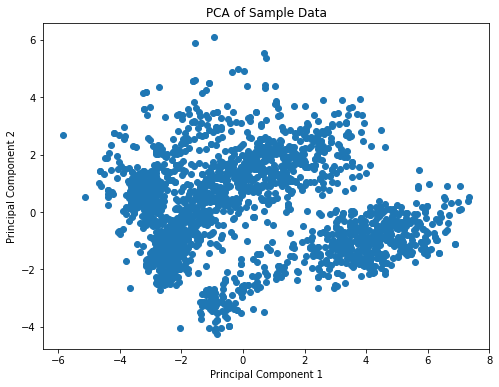

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sample Data')
plt.show()


Explained Variance Ratio: [0.36869666 0.12995127 0.0605445 ]


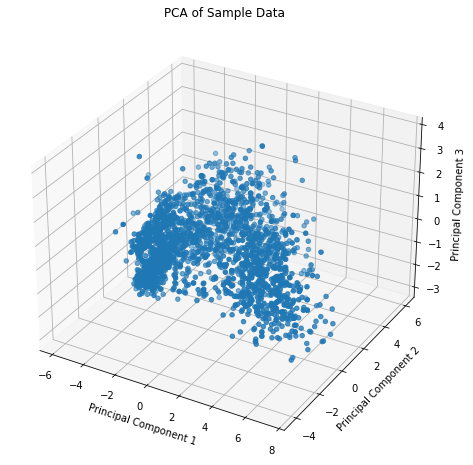

In [65]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Reduce to 3 components
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the principal components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Sample Data')

plt.show()


In [66]:
pca_df.describe()

,Principal Component 1,Principal Component 2,Principal Component 3
count,2.216000e+03,2.216000e+03,2.216000e+03
mean,4.989992e-17,8.497014e-17,-1.533070e-17
std,2.848682e+00,1.691218e+00,1.154374e+00
min,-5.843092e+00,-4.246046e+00,-2.962129e+00
25%,-2.497234e+00,-1.317128e+00,-9.014394e-01
50%,-8.003067e-01,-1.396250e-01,-1.217630e-01
75%,2.398025e+00,1.228183e+00,8.088580e-01
max,7.347919e+00,6.083305e+00,3.792022e+00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Component 3', ylabel='Density'>

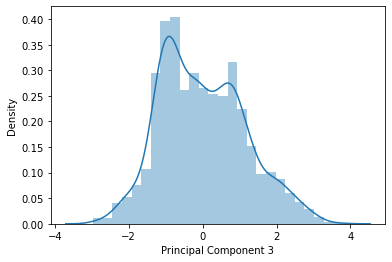

In [69]:
sns.distplot(pca_df['Principal Component 3'])

Explained Variance Ratio: [0.36869666 0.12995127 0.0605445 ]


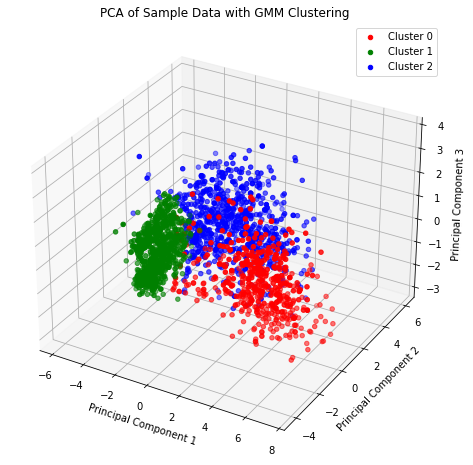

In [71]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(pca_df)
clusters = gmm.predict(pca_df)

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = clusters

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot the principal components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for clusters
colors = ['r', 'g', 'b']
cluster_labels = np.unique(clusters)

# Plot each cluster with a different color
for cluster_label in cluster_labels:
    indices = pca_df['Cluster'] == cluster_label
    ax.scatter(pca_df.loc[indices, 'Principal Component 1'],
               pca_df.loc[indices, 'Principal Component 2'],
               pca_df.loc[indices, 'Principal Component 3'],
               c=colors[cluster_label],
               label=f'Cluster {cluster_label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Sample Data with GMM Clustering')
ax.legend()

plt.show()


In [72]:
from sklearn.metrics import silhouette_score

pca_df['Cluster'] = clusters

# Evaluate the clustering model
silhouette_avg = silhouette_score(pca_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3']], clusters)
silhouette_avg

0.3924797060222326

In [75]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(pca_df)
clusters = gmm.predict(pca_df)

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = clusters

# Evaluate the clustering model
silhouette_avg = silhouette_score(pca_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3']], clusters)
silhouette_avg

0.43427807875097313

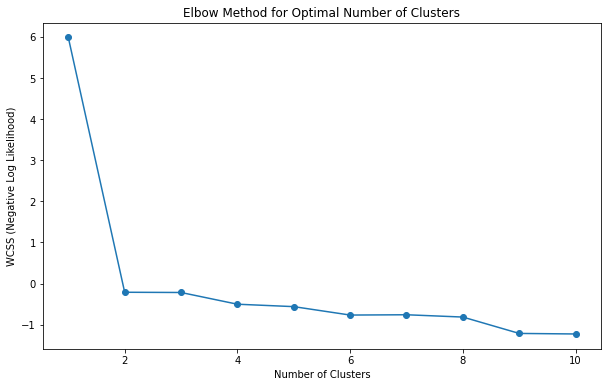

In [76]:
wcss = []
n_clusters_range = range(1, 11)

for n in n_clusters_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(pca_df)
    wcss.append(gmm.score(pca_df) * -1)  # Negative Log Likelihood (to simulate WCSS)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Negative Log Likelihood)')
plt.show()


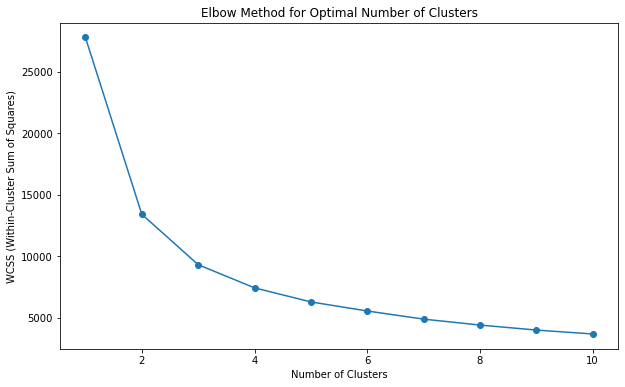

In [77]:
from sklearn.cluster import KMeans

wcss = []
n_clusters_range = range(1, 11)

for n in n_clusters_range:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [78]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(pca_df)
silhouette_avg_2 = silhouette_score(pca_df, clusters_2)
print(f'Silhouette Score for 2 clusters: {silhouette_avg_2}')

# Fit K-Means with 3 clusters and calculate Silhouette Score
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(pca_df)
silhouette_avg_3 = silhouette_score(pca_df, clusters_3)
print(f'Silhouette Score for 3 clusters: {silhouette_avg_3}')


Silhouette Score for 2 clusters: 0.4598407294034478
Silhouette Score for 3 clusters: 0.41795728111899627


Silhouette Score for 2 clusters: 0.652183149271022
Silhouette Score for 3 clusters: 0.5592141600798523


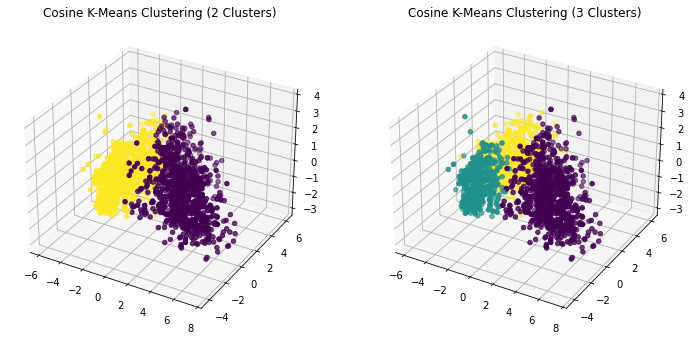

In [80]:
from sklearn.metrics.pairwise import cosine_distances


def cosine_kmeans(X, n_clusters, max_iter=300, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(range(X.shape[0]), n_clusters, replace=False)]
    for _ in range(max_iter):
        distances = cosine_distances(X, centroids)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

# Fit K-Means with 2 clusters using cosine similarity and calculate Silhouette Score
labels_2, centroids_2 = cosine_kmeans(pca_df.values, n_clusters=2)
silhouette_avg_2 = silhouette_score(pca_df, labels_2, metric='cosine')
print(f'Silhouette Score for 2 clusters: {silhouette_avg_2}')

# Fit K-Means with 3 clusters using cosine similarity and calculate Silhouette Score
labels_3, centroids_3 = cosine_kmeans(pca_df.values, n_clusters=3)
silhouette_avg_3 = silhouette_score(pca_df, labels_3, metric='cosine')
print(f'Silhouette Score for 3 clusters: {silhouette_avg_3}')

# Plotting the clusters
fig = plt.figure(figsize=(12, 6))

# Plot for 2 clusters
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], pca_df.iloc[:, 2], c=labels_2, cmap='viridis')
ax1.set_title('Cosine K-Means Clustering (2 Clusters)')

# Plot for 3 clusters
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], pca_df.iloc[:, 2], c=labels_3, cmap='viridis')
ax2.set_title('Cosine K-Means Clustering (3 Clusters)')

plt.show()
